<a href="https://colab.research.google.com/github/bobohope/bdc-summer-2024/blob/main/deep_learning_notebooks/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets


## 0. Parameters <a name="parameters"></a>

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [1]:
NUM_CLASSES = 10

## 1. Prepare data

By default, the image data consists of integers between 0 and 255 for each pixel channel. we first scales the number to [0,1]
Then we change the integer labeling of the images into one hot encoding

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 2. Build the model <a name="build"></a>

In Keras, you define the neural net using the functional API.
We used three types of Layers.
- Input layer - entry point into the network
- Flatten layer - flatten the image (3D) into a 1D vector (32x32x3RGB channel) = 3072
- Dense layer - the core of the neural network

model.summary() is used to inspect the model

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- You notice that the shape of the Input layer matches the shape of x_train and the shape of the last dense layer matches the shape of the one hot encode label y_train.

- Keras use NONE as a marker for the first dimension to show it doesn't know the number of training data that will be passed into the network. This is defined by the batch size.

## 3. Train the model <a name="train"></a>

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

The `fit` method takes in arguments:
- `x_train` the raw image data
- `y_train` the one hot encoded class label
- `batch_size` determines how many data points will be passed to the network at each training step
- `epochs` determines how many times the network will be shown the full training ata
- `shuffle` if `True` the batches will be drawn randomly without replacement from the training data at each training step

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8493 - accuracy: 0.3346
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6610 - accuracy: 0.4066
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5771 - accuracy: 0.4369
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5279 - accuracy: 0.4565
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4875 - accuracy: 0.4706
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4579 - accuracy: 0.4793
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4324 - accuracy: 0.4911
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4070 - accuracy: 0.4977
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3914 - accuracy: 0.5029
Epoch 10/10
1563/1563 [==============================] - 15s 9ms/step

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4265 - accuracy: 0.4967


[1.4265414476394653, 0.4966999888420105]

49% accuracy is a pretty good accuracy, if we predict randomly, accuracy will be 10% since we have 10 classes. Assuming the images are balance.

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


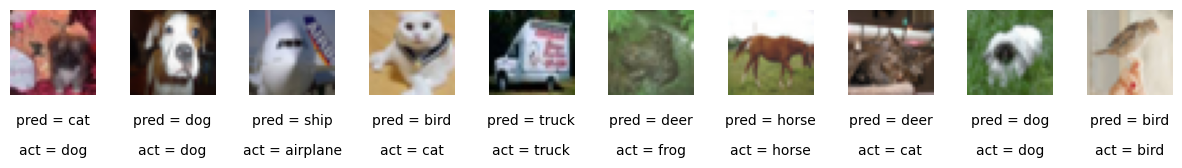

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)